# Initial Data Prep
##### Handling outliers and null values

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

In [26]:
# import relevant packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# import the california housing Data assigning it to a DataFRame
df = pd.read_csv('data/housing_data.csv')

# read the head of the data frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### View the info of the DataFrame

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20526 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


##### We can see that we have null values in the AveBedrms column

What should we do about these?


In [ ]:
True + True

In [3]:
# Get a count of all missing values
df.isna().sum()

MedInc          0
HouseAge        0
AveRooms      114
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
Target          0
dtype: int64

We could look into filing these values, however as we are only missing 114 out of 20640 values, we can simply drop these rows

We may be able to include them again, if AveRooms is not going to beincluded in our model. However, with such a small percentage, the difference would be minimal 

In [27]:
# Drop nulls
df = df.dropna()

# Look at DF info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20526 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20526 non-null  float64
 1   HouseAge    20526 non-null  float64
 2   AveRooms    20526 non-null  float64
 3   AveBedrms   20526 non-null  float64
 4   Population  20526 non-null  float64
 5   AveOccup    20526 non-null  float64
 6   Latitude    20526 non-null  float64
 7   Longitude   20526 non-null  float64
 8   Target      20526 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [5]:
# lets save this file for future reference
df.to_csv('data/housing_data_cleaned.csv', index=False)

### Are we now done with missing values?

Well, maybe, it could be the case that missing values have already been replaced with placeholders.

It is not uncommon to find missing values being given a value of an impossible values, in this case such as -1.

We should investigate the data further

In [6]:
# 5 figure summary of each column
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20526.000000,20526.000000,20526.000000,20526.000000,20526.000000,20526.000000,20526.000000,20526.000000,20526.000000
mean,3.870750,28.642989,5.429918,1.096888,1424.681721,3.069265,35.631331,-119.568598,2.068750
std,1.900945,12.586108,2.479265,0.475141,1131.041455,10.412486,2.137408,2.004190,1.154487
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.440789,1.006108,787.250000,2.428974,33.930000,-121.800000,1.196000
50%,3.535250,29.000000,5.229190,1.048780,1166.000000,2.817259,34.255000,-118.490000,1.796000
75%,4.742200,37.000000,6.052381,1.099572,1724.000000,3.281481,37.720000,-118.010000,2.649750
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##### It looks ok for any obvious signs of inputted values to cover NANs,

However we can identify some other issues with the data, namely outliers. 

Can you identify where we have problems?

What approaches should we take, as we move forward we will experiment with blindly removing all outliers and discuss

It would be best to visualise the data to see these more clearly

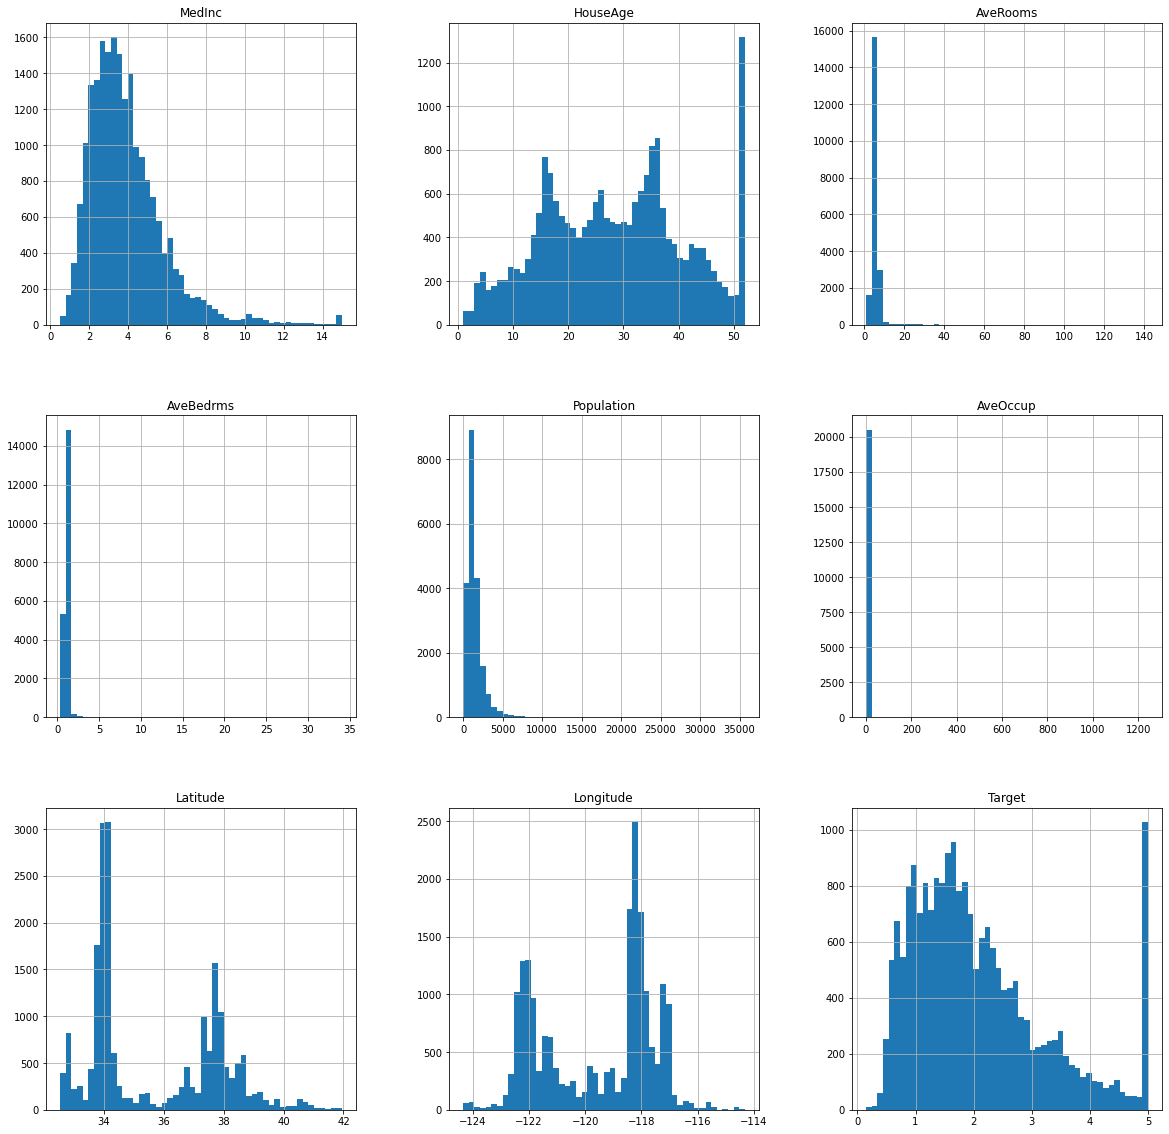

In [7]:
# Histograms of each feature
df.hist(bins=50, figsize=(20,20));

#### From the displays above we can see that we may have some outliers

For the purposes on the next part, we will use the <b><i>Tukey's Fences</b></i> definition of outliers, i.e., that is
```
1.5* the Interquartile Range below Q1 or
1.5* the Interquartile Range above Q3
```                                   
*There are many more accepted ways to define outliers and later you will use the <b>Mahalanobis Distance</b> method also*

In order to calculate it there are outliers, we need to calculate the InterQuartile Range, this is simply the 75th Percentile - the 25th Percentile as shown in the 5 number summary of each column below. 

25th percentile = Q1 and 

75th Percentile = Q3

In [8]:
df.loc[1, "MedInc"]

8.3014

In [9]:
df.describe().loc["25%", "MedInc"]

2.5625

we can easily access these values through Pandas

In [10]:
# Q1
Q1 = df['MedInc'].quantile(0.25)
Q1

2.5625

In [11]:
# Q3
Q3 = df['MedInc'].quantile(0.75)
Q3

4.7422

In [14]:
# the IQR is calculated by
IQR = df['MedInc'].quantile(0.75) - df['MedInc'].quantile(0.25)
IQR

2.1797000000000004

In [15]:
# hence to find the lower and upper bounds 
print('lower bound = ', Q1 - 1.5*IQR,'\n'
       'upper bound = ', Q3 + 1.5*IQR)


lower bound =  -0.7070500000000006 
upper bound =  8.011750000000001


#### Using this metric we would discard all values over 8.012 as the lower bound is negative and our min value is positive

## Task

Write a function called 'outliers_IQR'
 - that takes two arguments, 
 - a data frame and a column name.
 - returns the upper and lower bounds as we just defined



In [ ]:
def f(x):
    return x, x**2

In [ ]:
num, num_squared = f(10)
print(num)
print(num_squared)

In [16]:
def outliers_IQR(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5*IQR
    upper_bound = df[column].quantile(0.75) + 1.5*IQR
    return lower_bound, upper_bound

In [17]:
outliers_IQR(df, "MedInc")

(-0.7070500000000006, 8.011750000000001)

<details>
    <summary style="color:green;font-weight:bold">Solution</summary>

Trainer- Copy this cell contents to run assign the method
    
    
    def outliers_IQR(df, feature):
        Q1= df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        return upper_limit, lower_limit


In [19]:
def outliers_IQR(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [21]:
# Viewing the results
upper, lower = outliers_IQR(df, 'AveRooms')
print(upper,lower)

8.469769476019476 2.023400079650078


#### We will now remove these outliers in MedInc from our DataFrame


In [28]:
# In the code below we are assigning a copy of the cleaned DF to df_cleaned
# it will only contain the rows whos MedInc values fall within our accepted range
df_cleaned_IQR = df.copy()

df_cleaned_IQR = df_cleaned_IQR[(df_cleaned_IQR['MedInc'] > lower) & (df_cleaned_IQR['MedInc'] < upper)]

df_cleaned_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15187 entries, 4 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15187 non-null  float64
 1   HouseAge    15187 non-null  float64
 2   AveRooms    15187 non-null  float64
 3   AveBedrms   15187 non-null  float64
 4   Population  15187 non-null  float64
 5   AveOccup    15187 non-null  float64
 6   Latitude    15187 non-null  float64
 7   Longitude   15187 non-null  float64
 8   Target      15187 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


You can see we lost some rows of data 20526-19848 = 678 to be precise

Our tests identified 678 values classed as outliers in the Median Income column.

#### View the distributions again

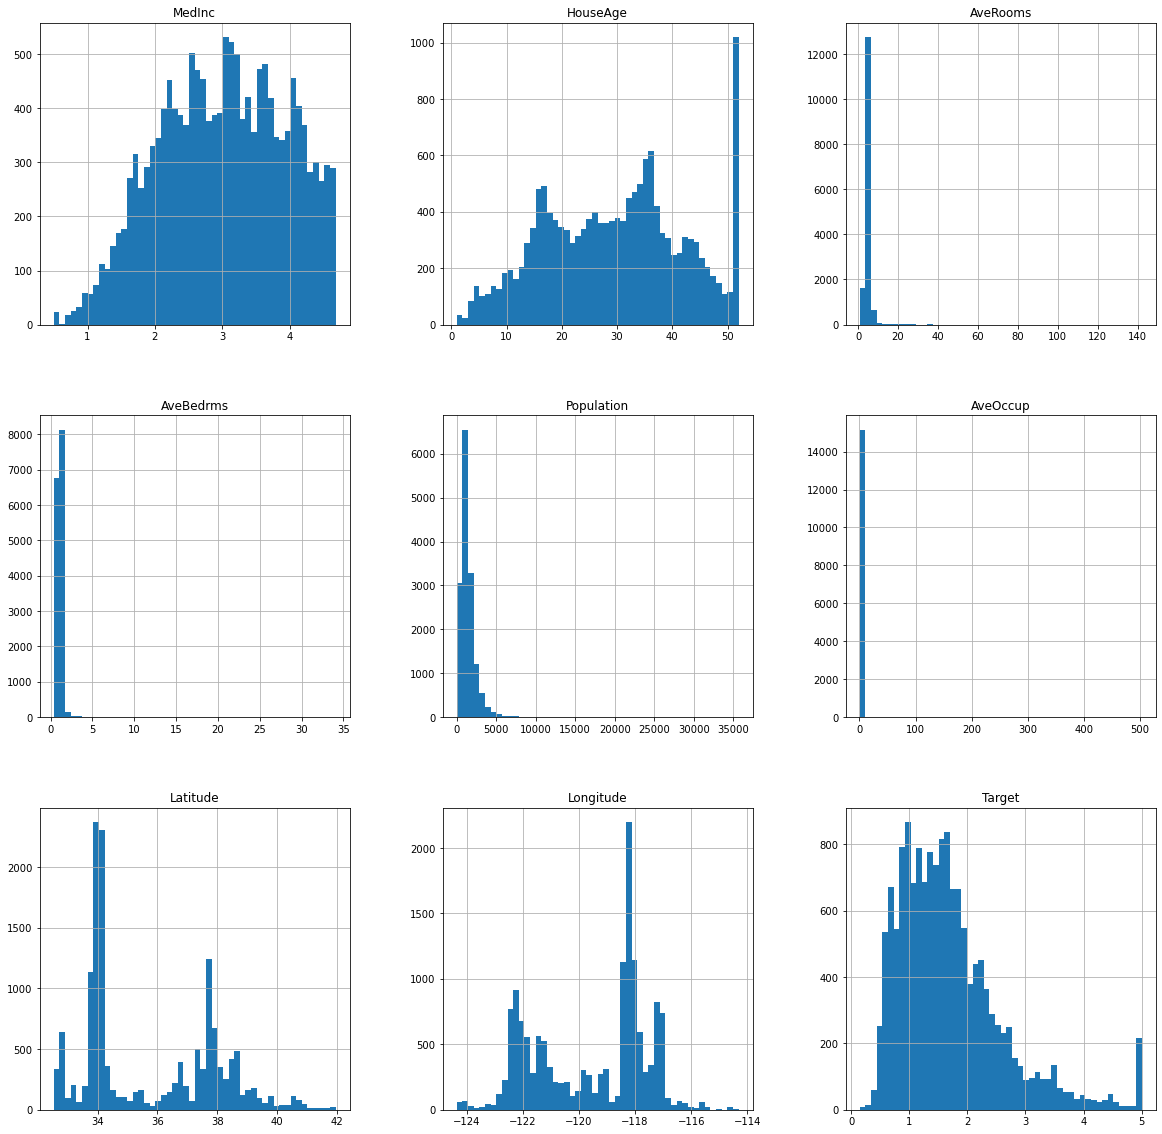

In [29]:
df_cleaned_IQR.hist(bins=50, figsize=(20,20));

We can see that MedInc has been capped at 8, however We still have lots of outliers in other fields and should address these also.

## Task:
Apply the same approach to all columns, including the target column
 - ensure to keep track of the meta data seeing the changes, i.e the number of rows
 - ensure to visualise the data
 - finally save the DataFrame to a csv named, 'housing_cleaned_IQR.csv', set 'index = False' as an argument when saving
 - you should end up with 16141 entries in total
 - the distributions should look like below
 - you will be able to view the saved file in the same folder where this notebook is, as long as you didnt specify another directory

In [24]:
df_cleaned_IQR = df.copy()

for column in df_cleaned_IQR.columns:
    upper, lower = outliers_IQR(df_cleaned_IQR, column)
    
    df_cleaned_IQR = df_cleaned_IQR[(df_cleaned_IQR[column] > lower) & (df_cleaned_IQR[column] < upper)]

df_cleaned_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 3 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16141 non-null  float64
 1   HouseAge    16141 non-null  float64
 2   AveRooms    16141 non-null  float64
 3   AveBedrms   16141 non-null  float64
 4   Population  16141 non-null  float64
 5   AveOccup    16141 non-null  float64
 6   Latitude    16141 non-null  float64
 7   Longitude   16141 non-null  float64
 8   Target      16141 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


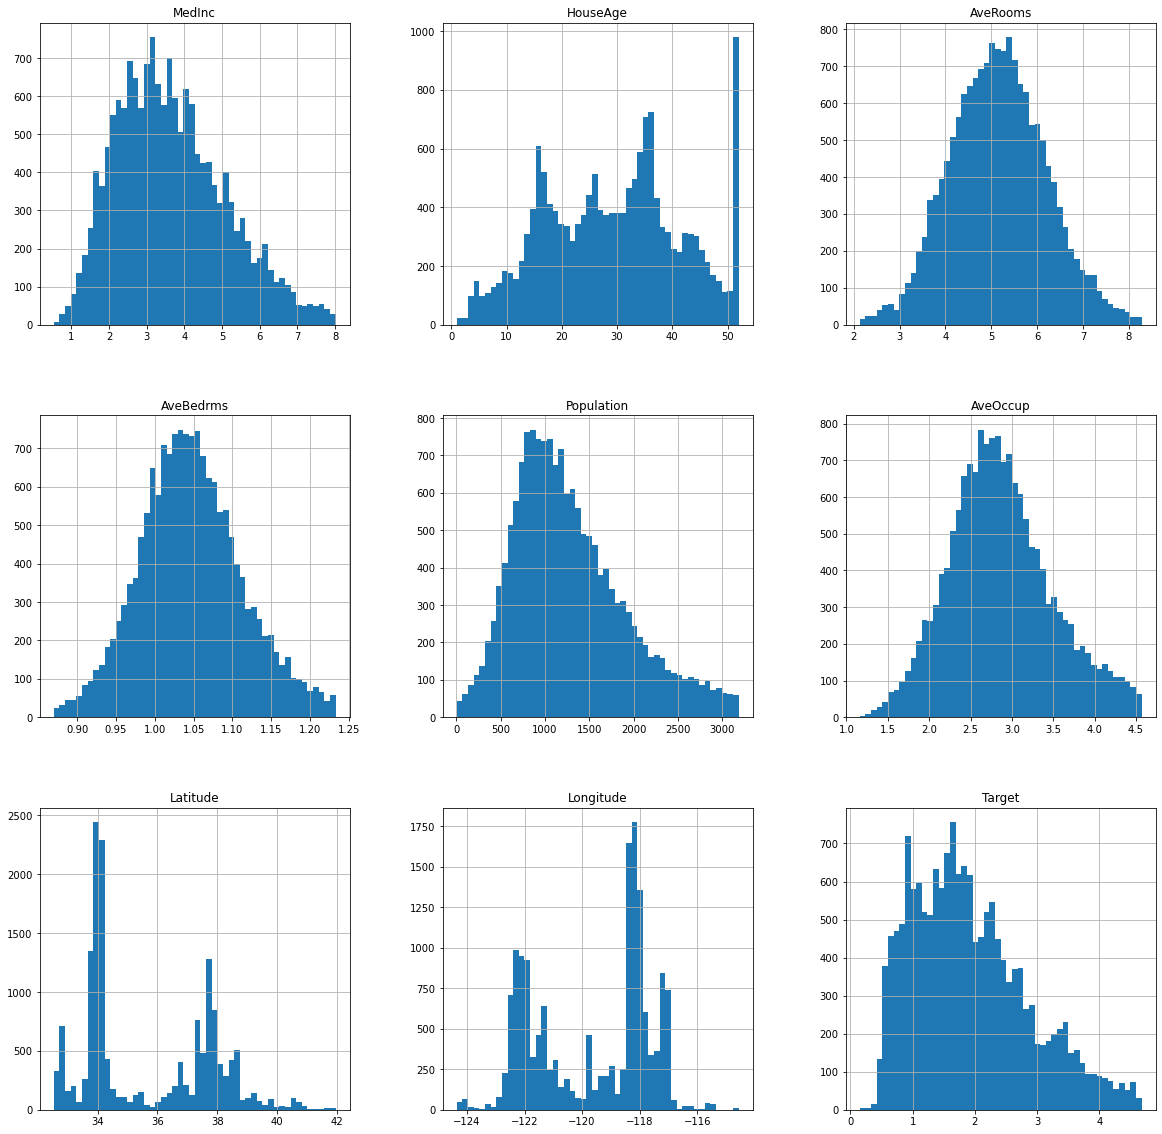

In [25]:
df_cleaned_IQR.hist(bins=50, figsize=(20,20))

df_cleaned_IQR.to_csv('data/housing_cleaned_IQR.csv', index=False)

In [ ]:
# info and distributions after cleaning

<details>
    <summary style="color:green;font-weight:bold">Solution</summary>

    cols = list(df_cleaned_IQR.columns)
    cols.remove('MedInc')


    for column in cols:
        upper,lower = outliers_IQR(df_cleaned_IQR,column)
        df_cleaned_IQR = df_cleaned_IQR[(df_cleaned_IQR[column] > lower) & (df_cleaned_IQR[column] < upper)]


    df_cleaned_IQR.info()

    df_cleaned_IQR.hist(bins=50, figsize=(20,20))

    df_cleaned_IQR.to_csv('data/housing_cleaned_IQR.csv', index=False)


</details>

# What do you think of this approach to removing all the outliers as defined above on all features?

In [ ]:
# Lets compare both distributions and discuss

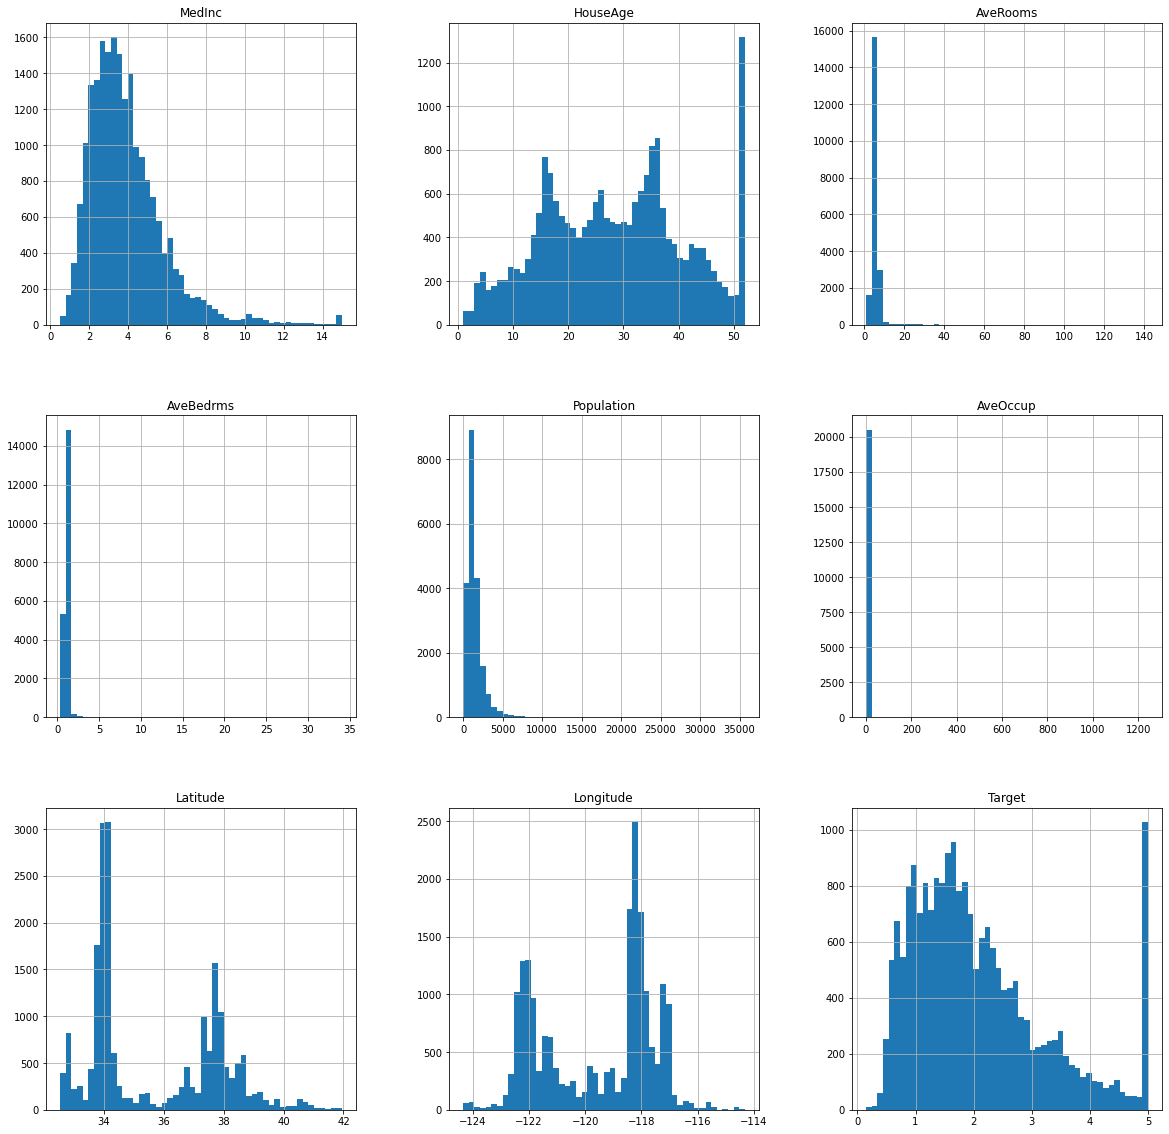

In [30]:
# Original
df.hist(bins = 50, figsize=(20,20));

In [ ]:
# Cleaned
df_cleaned_IQR.hist(bins=50, figsize=(20,20));

#### What has the elimination of outliers done to our data?

#### Describe the new sub set of the data we are looking at?

#### Can you think of any other ways we could have removed some outliers?

#### How will removing outliers impact our model?

#### Can you think of any other solutions?


<details>
    <summary style="color:green;font-weight:bold">Discussion</summary>
    
#### What has the elimination of outliers done to our data?
Reduced the number of observations by 3707 or 18%, this is quite large. Are we losing valuable information?


#### Describe the new sub set of the data we are looking at?
We have excluded the blocks with the largest numbers of avgrooms, bedrooms etc with the blocks of the highest meadian value(target)

#### Can you think of any other ways we could have removed some outliers?
An initial way could be done by eye, only removing the most extreme, it looks like avgOccupancy has errors in it.
Here we have houses with average occupancy of 1,200 people. The reason for this is explained in the description of the data. It may be a block with many empty households such as vacation homes etc.
    
There is a good case to remove the extreme outliers with AvgRoom and AvgBed, figures for average households having hundreds of rooms is either an error, or really not representitve of the vast majoroty of the data.
    
There are many other methods used to remove outliers using the Mean and SD, or bivariate methods for example, and many more complicated solutions. There is also the approach that outliers should not be revomed unless we have a strong reason to do so.
    
Sometimes outliers are bad data, and should be excluded, such as typos. Sometimes they are exceptional but real data points and should be kept.
    
Domain knowledge is important here.
    
In our case using this rule to exclude outliers removed 18% of the data.
    

#### What will be the overall effects of removing outliers have on our model?
We will be able to build a much more accurate model on the sub section, but our model in turn will not generalise well for all California Districts. e.g if we build a model and exclude the highest target vales, here they are capped below 5, it will be a terrible predictor for any houses that should have a value over that. And by extensions predicting prices for households that have features well outside our predefined range.

#### Can you think of any other solutions?
There are also some models that are not so sensitive to outliers, Tree based Models for example, but they are not so good for regression. However Robust Linear Regression methods exist that are less sensitive to them also.


##### Summary

The decision to remove data from your dataset is a subject-matter decision, not a statistical decision. 
Statistics help you to identify outliers given what you believe about the dataset.

The crude IQR method may not be the best idea for this dataset. Is 18% of the data being classified as outliers logical? It's nearly a fifth of what we have.

Removing the most extreme cases of house sizes would be good enough to help our model. It would be very hard to build a one size fits all model for such a disparity of house sizes and with such a low amount of, if we take the figures to be true, sprawling mansions in the mix.

Any model we create will have it limitationsand bulding the best possible one will depend on it's use case



Here are some good articles about treating outliers

B. Iglewicz and D. C. Hoaglin, How to Detect and Handle Outliers (Milwaukee: ASQC Press) 1993.


A more advanced and detailed treatment is given in

V. Barnett and T. Lewis, Outliers in Statistical Data (New York: John Wiley and Sons) 1994.

# Extension

# Using Mean and STD to remove outliers

# Mahalanobis Distance Method
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers. We will accecpt this condition to proceed

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

So, if the mean is 100 and the standard deviation is 10, then all data in the sample between 90 and 110 will account for about 68% of the total values. We can cover more of the data sample if we expand the range as follows:

1 Standard Deviation from the Mean: 68%<br>
2 Standard Deviations from the Mean: 95%<br>
3 Standard Deviations from the Mean: 99.7%<br>

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

## Task
Apply Mahalanobis Distance Method to all columns, including the target column:
 - ensure to keep track of the meta data seeignt he changes, i.e the number of rows
 - ensure to visualise the data 
 - finally save the DataFrame to a csv named, 'housing_cleaned_STD.csv', set 'index = False' as an argument when saving
 - you should end up with 19358 entries in total
 - the distributions should look like below
 - you will be able to view the saved file in the same folder where this notebook is, as long as you didnt specify another directory
 - You can easily find the Mean and SD for any column in pandas, look at the following documentation, https://pandas.pydata.org/docs/reference/api/pandas.Series.html, you can see a list of methods on the left hand pane
 - emulate the approach taken before
 - once again try to retype coe rather than copy and paste to help you famaliarize yourself wth the syntax
 - Getting brackets, commas etc wrong and fixing the errors is the best way to learn

In [ ]:
# Results of excluding Outliers using the 3 Standard Deviation Rule

<details>
    <summary style="color:green;font-weight:bold">Solution</summary>


    def outliers_STD(df, feature):
        mean= df[feature].mean()
        sd = df[feature].std()
        upper_limit = mean + 3*sd
        lower_limit = mean-3*sd
        return upper_limit, lower_limit


    cols = list(df.columns)
    df_cleaned_STD = df.copy()


    for column in cols:
        upper,lower = outliers_STD(df_cleaned_STD,column)
        df_cleaned_STD = df_cleaned_STD[(df_cleaned_STD[column] > lower) & (df_cleaned_STD[column] < upper)]


    df_cleaned_STD.info()

    df_cleaned_STD.hist(bins=50, figsize=(20,20))

    df_cleaned_STD.to_csv('data/housing_data_cleaned_STD.csv', index=False)

## Identifying whether data is MCAR, MAR, or MNAR

In [ ]:
import seaborn as sns

### MCAR
Approaces to identifying MCAR data include:
* Accepting null of Little's Test
* Encoding the feature of interest as missing/not missing, and proceeding to run:
    * T-tests
    * $\chi^2$-tests
    * Logistic regression to indentify association between feature & missingness

#### Log Reg

In [ ]:
df.info()

In [ ]:
df_random = df.copy()

In [ ]:
df_random['AveRooms'].isna().astype(int)

In [ ]:
df_random['AveRooms'] = df_random['AveRooms'].isna().astype(int)

In [ ]:
from statsmodels.formula.api import logit

log_reg = logit("AveRooms ~ MedInc + HouseAge + AveBedrms + Population + AveOccup + Latitude + Longitude",
                data=df_random).fit()

In [ ]:
log_reg.summary()

#### Aggregation

In [ ]:
df_random.groupby('AveRooms').plot.(kind='hist')

In [ ]:
sns.pairplot(data=df_random,
             hue='AveRooms')

### MAR
Approaces to identifying MCAR data include:
* Visual inspection
* Rejecting null of Little's Test
* Encodeing the feature of interest as missing/not missing, and proceeding to run:
    * T-tests
    * $\chi^2$-tests
    * Logistic regression to indentify association between feature & missingness

### MNAR
Approaces to identifying MCAR data include:
* Domain knowledge
* Further data collection/sampling

In [ ]:
df.value_counts()